# Final Processing
The final processing stage requires:
1. Quick validation of catalogues and Bayesian Pvalue maps
2. Skewness level
3. Adding flag to catalogue

In [2]:
import seaborn as sns
from astropy.table import Table
%matplotlib inline
import numpy as np
import pylab as plt

## Read tables

In [3]:
catL=Table.read('./data/Ldust/dmu26_XID+SPIRE_HDF-N_cat.fits')
catP=Table.read('./data/prev/dmu26_XID+SPIRE_HDF-N_cat.fits')
catNew=Table.read('./data/20201112/dmu26_XID+SPIRE_HDF-N_cat.fits')
catIp=Table.read('./data/ipac/dmu26_XID+SPIRE_HDF-N_cat_ipacPrior.fits')
catnewL=Table.read('./data/newLdust/dmu26_XID+SPIRE_HDF-N_cat.fits')
catNew_i1=Table.read('./data/20201227/dmu26_XID+SPIRE_HDF-N_cat.fits') # New irac cut f_irac > 1
catNew_i5=Table.read('./data/20210116_numpyro/dmu26_SPIRE_HDF-N_cat_iraccut5_numpyro.fits') # New irac cut f_irac >= 5 numpyro
catNew_i5s=Table.read('./data/20210116/dmu26_SPIRE_HDF-N_cat_iraccut5_stan.fits') # New irac cut f_irac >= 5 stan
catNew_i5s_seip=Table.read('./data/20210127_seipmap2/dmu26_SPIRE_HDF-N_cat_iraccut5_seipmap2.fits') # New irac cut f_irac >= 5 stan - seipmap2 priors


In [3]:
len(catNew_i5s)

3310

## Look at Symmetry of PDFs to determine depth level of catalogue

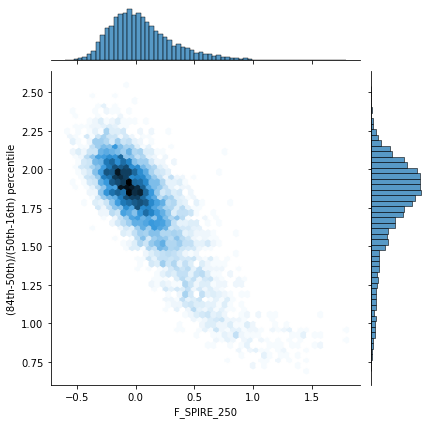

In [8]:
skew=(catP['FErr_SPIRE_250_u']-catP['F_SPIRE_250'])/(catP['F_SPIRE_250']-catP['FErr_SPIRE_250_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(catP['F_SPIRE_250']),y=skew, kind='hex')

# g.savefig('../../data/figs/sk_SPIRE250_HDF-N.png', bbox='tight')
# g.savefig('../../data/figs/sk_SPIRE250_HDF-N.pdf', bbox='tight')


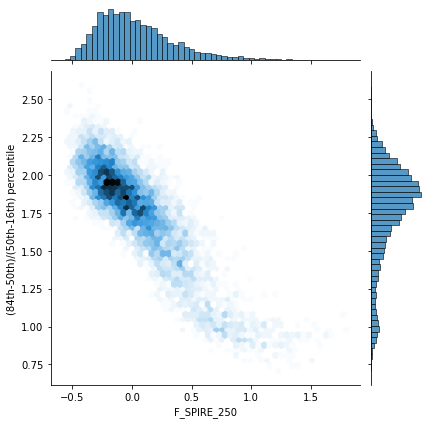

In [33]:
skew=(catNew['FErr_SPIRE_250_u']-catNew['F_SPIRE_250'])/(catNew['F_SPIRE_250']-catNew['FErr_SPIRE_250_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(catNew['F_SPIRE_250']),y=skew, kind='hex')

# g.savefig('../../data/figs/sk_SPIRE250_HDF-N.png', bbox='tight')
# g.savefig('../../data/figs/sk_SPIRE250_HDF-N.pdf', bbox='tight')


In [34]:
len(skew[skew<1.25])

543

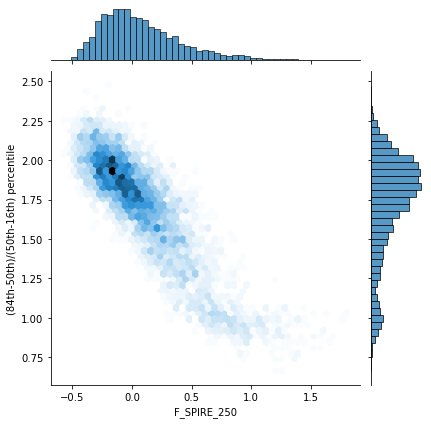

In [21]:
skew=(catNew_i1['FErr_SPIRE_250_u']-catNew_i1['F_SPIRE_250'])/(catNew_i1['F_SPIRE_250']-catNew_i1['FErr_SPIRE_250_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(catNew_i1['F_SPIRE_250']),y=skew, kind='hex')

# g.savefig('../../data/figs/sk_SPIRE250_HDF-N.png', bbox='tight')
# g.savefig('../../data/figs/sk_SPIRE250_HDF-N.pdf', bbox='tight')


/home/mc741/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1774: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.fig.savefig(*args, **kwargs)


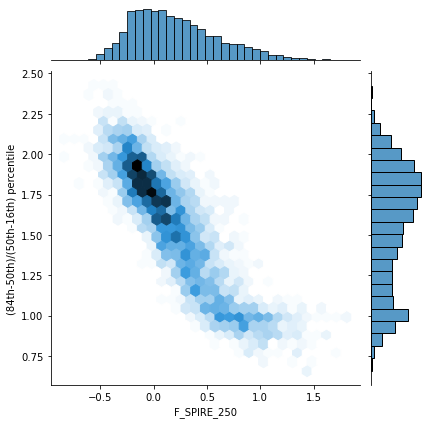

In [13]:
skew=(catNew_i5s['FErr_SPIRE_250_u']-catNew_i5s['F_SPIRE_250'])/(catNew_i5s['F_SPIRE_250']-catNew_i5s['FErr_SPIRE_250_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
use = skew < 5
g=sns.jointplot(x=np.log10(catNew_i5s['F_SPIRE_250'][use]),y=skew[use], kind='hex')

# g.savefig('../../data/figs/sk_SPIRE250_HDF-N.png', bbox='tight')
# g.savefig('../../data/figs/sk_SPIRE250_HDF-N.pdf', bbox='tight')

g.savefig('../../data/numpyro_HDFN/sk_SPIRE250_HDF-N_stan.png', bbox='tight')



In [14]:
use2 = skew < 1.2
use2.sum()

730

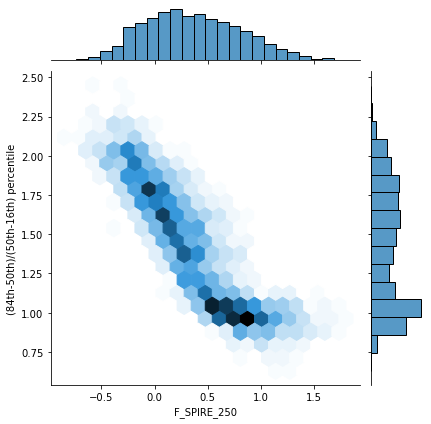

In [9]:
skew=(catNew_i5s_seip['FErr_SPIRE_250_u']-catNew_i5s_seip['F_SPIRE_250'])/(catNew_i5s_seip['F_SPIRE_250']-catNew_i5s_seip['FErr_SPIRE_250_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
use = skew < 5
g=sns.jointplot(x=np.log10(catNew_i5s_seip['F_SPIRE_250'][use]),y=skew[use], kind='hex')

# g.savefig('../../data/figs/sk_SPIRE250_HDF-N.png', bbox='tight')
# g.savefig('../../data/figs/sk_SPIRE250_HDF-N.pdf', bbox='tight')

# g.savefig('../../data/numpyro_HDFN/sk_SPIRE250_HDF-N_stan.png', bbox='tight')



In [10]:
use2 = skew < 1.2
use2.sum()

676

In [7]:
len(catNew_i5s_seip)

1796

/home/mc741/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:1774: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  self.fig.savefig(*args, **kwargs)


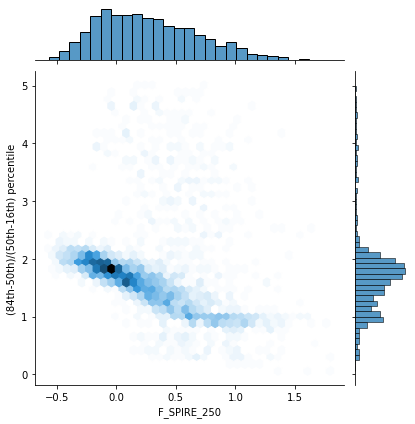

In [11]:
skew=(catNew_i5['FErr_SPIRE_250_u']-catNew_i5['F_SPIRE_250'])/(catNew_i5['F_SPIRE_250']-catNew_i5['FErr_SPIRE_250_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
use = skew < 5
g=sns.jointplot(x=np.log10(catNew_i5['F_SPIRE_250'][use]),y=skew[use], kind='hex')

# g.savefig('../../data/figs/sk_SPIRE250_HDF-N.png', bbox='tight')
# g.savefig('../../data/figs/sk_SPIRE250_HDF-N.pdf', bbox='tight')


g.savefig('../../data/numpyro_HDFN/sk_SPIRE250_HDF-N_numpyro.png', bbox='tight')



In [12]:
use2 = skew < 1.2
use2.sum()

556

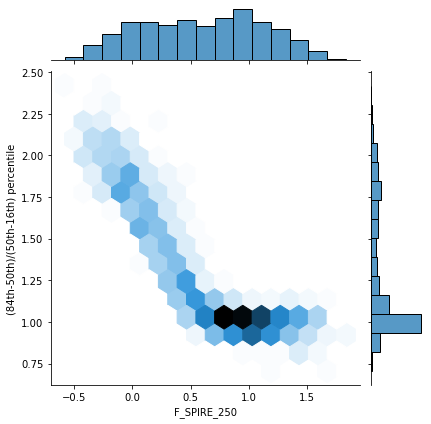

In [29]:
skew=(catnewL['FErr_SPIRE_250_u']-catnewL['F_SPIRE_250'])/(catnewL['F_SPIRE_250']-catnewL['FErr_SPIRE_250_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(catnewL['F_SPIRE_250']),y=skew, kind='hex')

# g.savefig('../../data/figs/sk_SPIRE250_HDF-N.png', bbox='tight')
# g.savefig('../../data/figs/sk_SPIRE250_HDF-N.pdf', bbox='tight')


In [6]:
len(catnewL)

1075

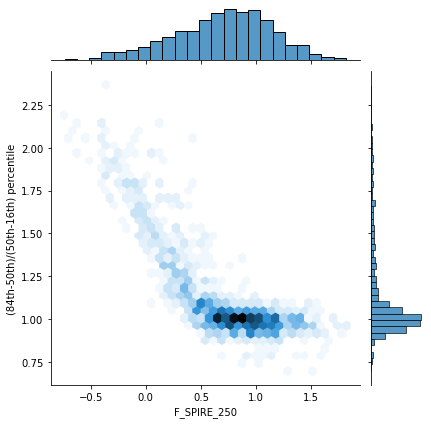

In [31]:
skew=(catIp['FErr_SPIRE_250_u']-catIp['F_SPIRE_250'])/(catIp['F_SPIRE_250']-catIp['FErr_SPIRE_250_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(catIp['F_SPIRE_250']),y=skew, kind='hex')

# g.savefig('../../data/figs/sk_SPIRE250_HDF-N.png', bbox='tight')
# g.savefig('../../data/figs/sk_SPIRE250_HDF-N.pdf', bbox='tight')


In [20]:
len(catNew2[])

5220

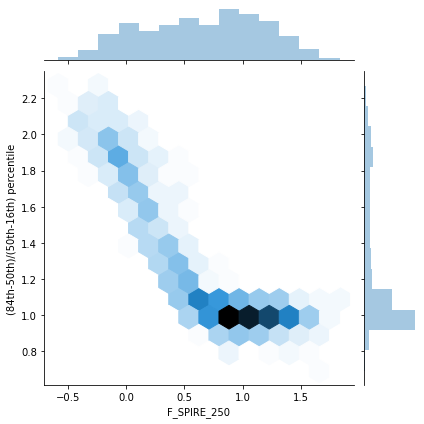

In [7]:
skew=(cat['FErr_SPIRE_250_u']-cat['F_SPIRE_250'])/(cat['F_SPIRE_250']-cat['FErr_SPIRE_250_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_250']),y=skew, kind='hex')

g.savefig('../../data/figs/sk_SPIRE250_HDF-N.png', bbox='tight')
g.savefig('../../data/figs/sk_SPIRE250_HDF-N.pdf', bbox='tight')


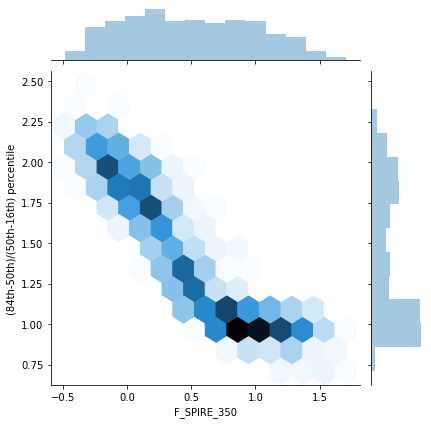

In [7]:
skew=(cat['FErr_SPIRE_350_u']-cat['F_SPIRE_350'])/(cat['F_SPIRE_350']-cat['FErr_SPIRE_350_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_350']),y=skew, kind='hex')

g.savefig('../../data/figs/sk_SPIRE350_HDF-N.png', bbox='tight')
g.savefig('../../data/figs/sk_SPIRE350_HDF-N.pdf', bbox='tight')

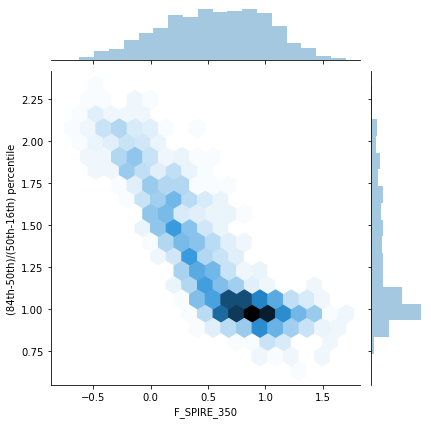

In [5]:
skew=(cat['FErr_SPIRE_350_u']-cat['F_SPIRE_350'])/(cat['F_SPIRE_350']-cat['FErr_SPIRE_350_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_350']),y=skew, kind='hex')

# g.savefig('../../data/figs/sk_SPIRE350_HDF-N.png', bbox='tight')
# g.savefig('../../data/figs/sk_SPIRE350_HDF-N.pdf', bbox='tight')

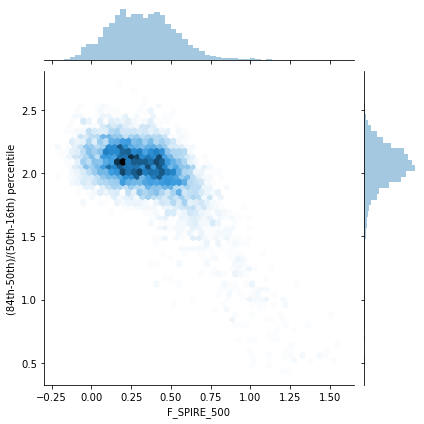

In [57]:
skew=(cat['FErr_SPIRE_500_u']-cat['F_SPIRE_500'])/(cat['F_SPIRE_500']-cat['FErr_SPIRE_500_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_500']),y=skew, kind='hex')

# g.savefig('../../data/figs/sk_SPIRE500_HDF-N.png', bbox='tight')
# g.savefig('../../data/figs/sk_SPIRE500_HDF-N.pdf', bbox='tight')


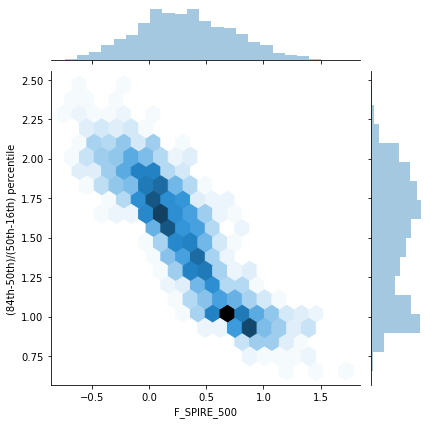

In [6]:
skew=(cat['FErr_SPIRE_500_u']-cat['F_SPIRE_500'])/(cat['F_SPIRE_500']-cat['FErr_SPIRE_500_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(cat['F_SPIRE_500']),y=skew, kind='hex')

# g.savefig('../../data/figs/sk_SPIRE500_HDF-N.png', bbox='tight')
# g.savefig('../../data/figs/sk_SPIRE500_HDF-N.pdf', bbox='tight')


In [5]:
10**0.5

3.1622776601683795

## Add flag to catalogue

In [22]:
from astropy.table import Column
cat = catNew_i5s
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_250'))
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_350'))
cat.add_column(Column(np.zeros(len(cat), dtype=bool),name='flag_spire_500'))

In [23]:
ind_250=(cat['Pval_res_250']>0.5) | (cat['F_SPIRE_250'] < 3)
ind_350=(cat['Pval_res_350']>0.5) | (cat['F_SPIRE_350'] < 3)
ind_500=(cat['Pval_res_500']>0.5) | (cat['F_SPIRE_500'] < 3)


In [24]:
print(ind_250.sum(),ind_350.sum(),ind_500.sum(),len(cat))

3310 3310 3310 3310


In [25]:
cat['flag_spire_250'][ind_250]=True
cat['flag_spire_350'][ind_350]=True
cat['flag_spire_500'][ind_500]=True

In [26]:
cat.write('./data/ipac/dmu26_XID+SPIRE_HDF-N_cat_20210116_iraccut5_stan.fits', format='fits',overwrite=True)


### Check Map

In [16]:
from astropy.io import fits
import pylab as plt

In [17]:
Pval1=fits.open('./data/prev/dmu26_XID+SPIRE_psw_HDF-N_Bayes_Pval.fits')
Pval2=fits.open('./data/Ldust/dmu26_XID+SPIRE_psw_HDF-N_Bayes_Pval.fits')
Pval3=fits.open('./data/20201112/dmu26_XID+SPIRE_psw_HDF-N_Bayes_Pval.fits')
Pval4=fits.open('./data/ipac/dmu26_XID+SPIRE_psw_HDF-N_Bayes_Pval.fits')
Pval5=fits.open('./data/newLdust/dmu26_XID+SPIRE_psw_HDF-N_Bayes_Pval.fits')
Pval6=fits.open('./data/20201227/dmu26_XID+SPIRE_psw_HDF-N_Bayes_Pval.fits')
Pval7=fits.open('./data/20210116_numpyro/dmu26_XID+SPIRE_psw_HDF-N_Bayes_Pval.fits')
Pval8=fits.open('./data/20210116/dmu26_XID+SPIRE_psw_HDF-N_Bayes_Pval.fits')
Pval9=fits.open('./data/20210127_seipmap2/dmu26_XID+SPIRE_psw_HDF-N_Bayes_Pval.fits')


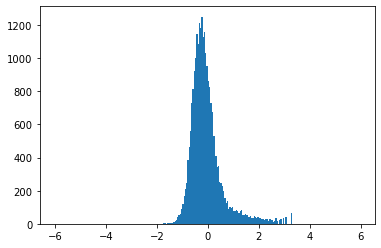

In [69]:
plt.hist(Pval1[1].data[np.isfinite(Pval1[1].data)],bins=np.arange(-6,6,0.05));

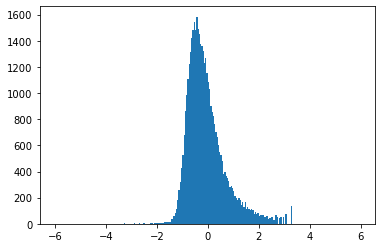

In [70]:
plt.hist(Pval2[1].data[np.isfinite(Pval2[1].data)],bins=np.arange(-6,6,0.05));

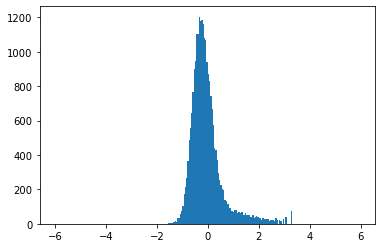

In [71]:
plt.hist(Pval3[1].data[np.isfinite(Pval3[1].data)],bins=np.arange(-6,6,0.05));

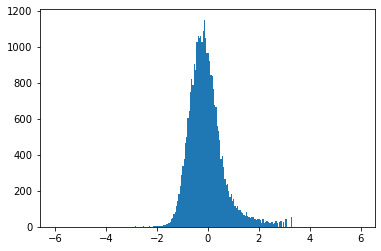

In [14]:
plt.hist(Pval4[1].data[np.isfinite(Pval4[1].data)],bins=np.arange(-6,6,0.05));

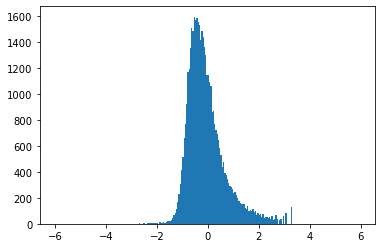

In [10]:
plt.hist(Pval5[1].data[np.isfinite(Pval5[1].data)],bins=np.arange(-6,6,0.05));

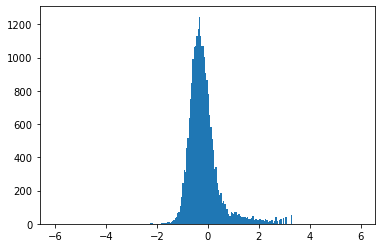

In [8]:
plt.hist(Pval7[1].data[np.isfinite(Pval7[1].data)],bins=np.arange(-6,6,0.05));

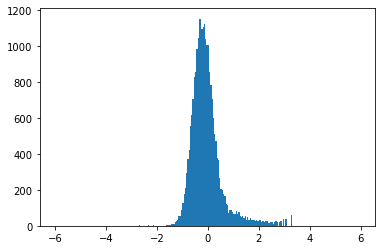

In [9]:
plt.hist(Pval8[1].data[np.isfinite(Pval8[1].data)],bins=np.arange(-6,6,0.05));

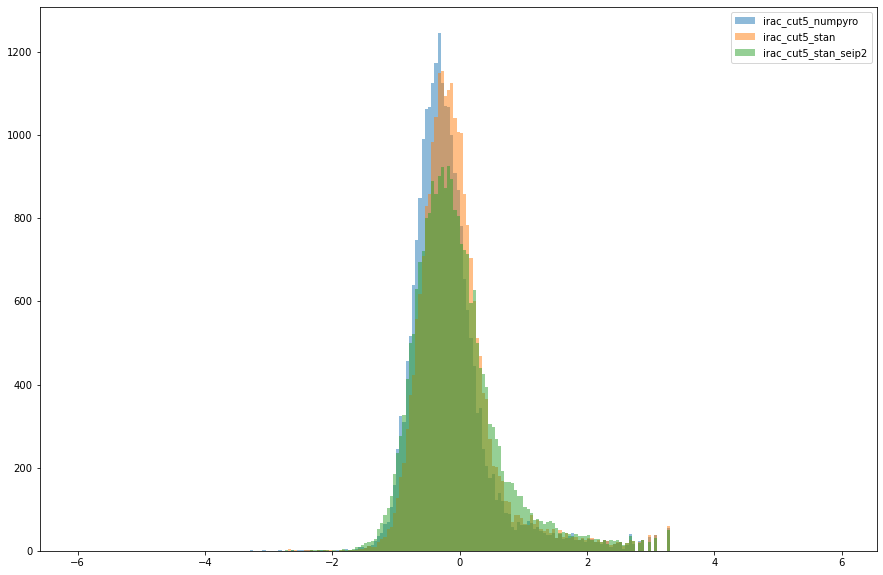

In [18]:
plt.figure(figsize=(15,10))
# plt.hist(Pval1[1].data[np.isfinite(Pval1[1].data)],bins=np.arange(-6,6,0.05), alpha=0.5, label='prev');
# plt.hist(Pval2[1].data[np.isfinite(Pval2[1].data)],bins=np.arange(-6,6,0.05), alpha=0.5, label='Ldust');
# plt.hist(Pval5[1].data[np.isfinite(Pval5[1].data)],bins=np.arange(-6,6,0.05), alpha=0.5, label='newLdust');
# plt.hist(Pval3[1].data[np.isfinite(Pval3[1].data)],bins=np.arange(-6,6,0.05), alpha=0.5, label='new');
# plt.hist(Pval4[1].data[np.isfinite(Pval4[1].data)],bins=np.arange(-6,6,0.05), alpha=0.5, label='ipac');
# plt.hist(Pval6[1].data[np.isfinite(Pval6[1].data)],bins=np.arange(-6,6,0.05), alpha=0.5, label='irac_cut1');
plt.hist(Pval7[1].data[np.isfinite(Pval7[1].data)],bins=np.arange(-6,6,0.05), alpha=0.5, label='irac_cut5_numpyro');
plt.hist(Pval8[1].data[np.isfinite(Pval8[1].data)],bins=np.arange(-6,6,0.05), alpha=0.5, label='irac_cut5_stan');
plt.hist(Pval9[1].data[np.isfinite(Pval9[1].data)],bins=np.arange(-6,6,0.05), alpha=0.5, label='irac_cut5_stan_seip2');
plt.legend()

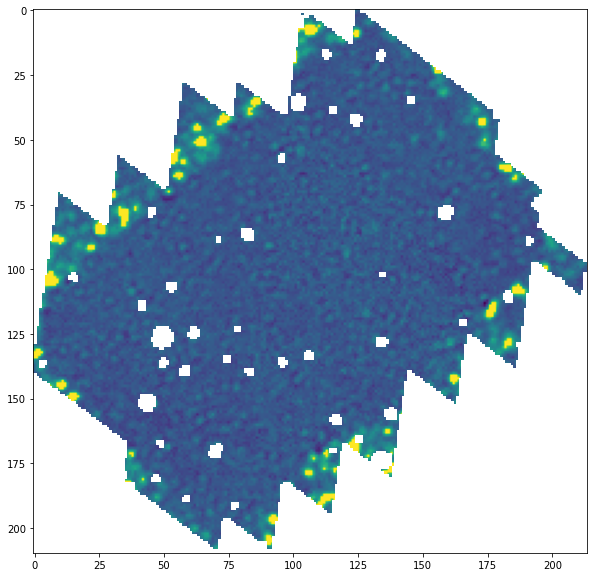

In [8]:
plt.figure(figsize=(15,10))
plt.imshow(Pval1[1].data)

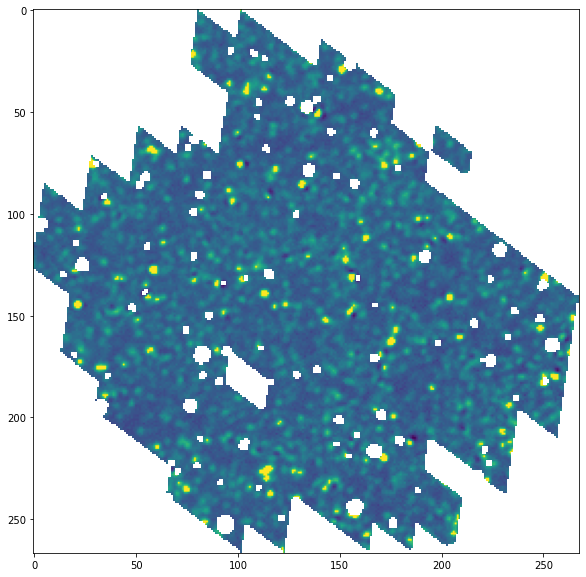

In [9]:
plt.figure(figsize=(15,10))
plt.imshow(Pval2[1].data)

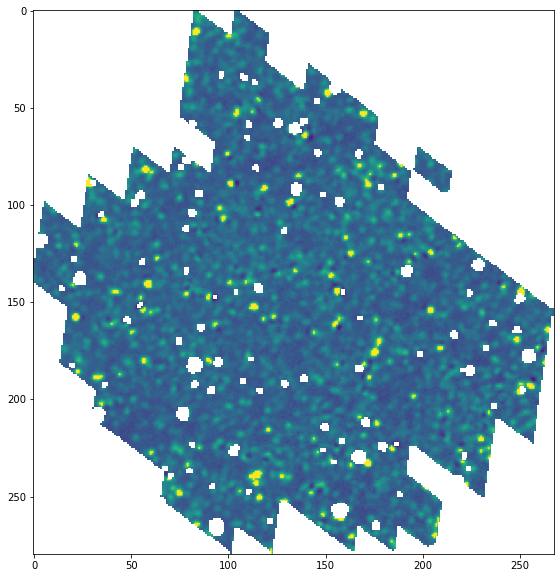

In [15]:
plt.figure(figsize=(15,10))
plt.imshow(Pval5[1].data)

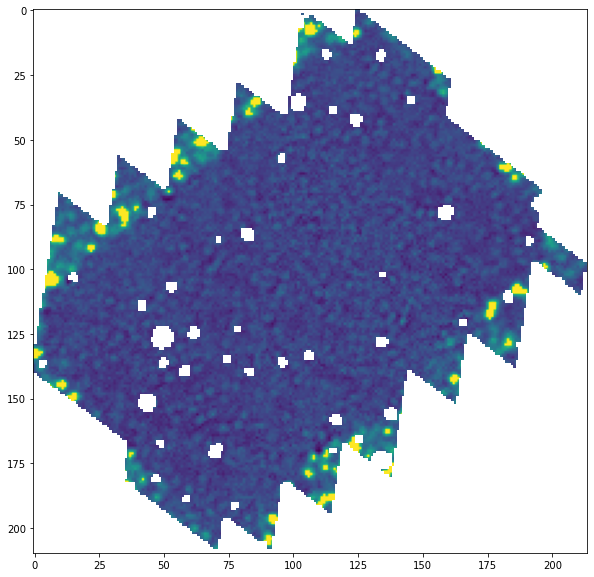

In [10]:
plt.figure(figsize=(15,10))
plt.imshow(Pval3[1].data)

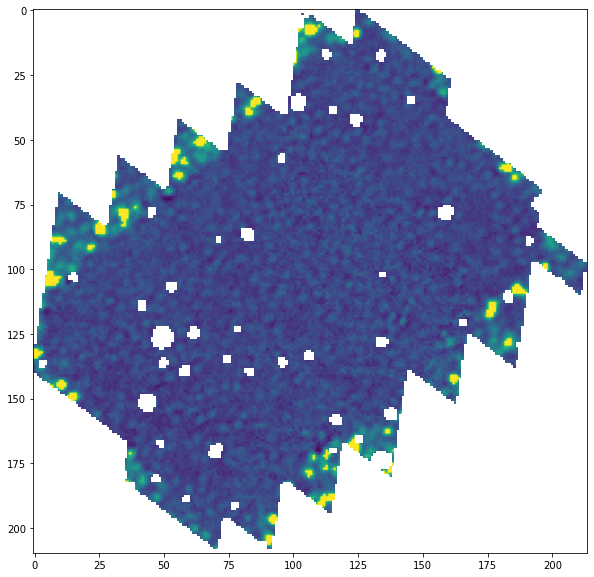

In [16]:
plt.figure(figsize=(15,10))
plt.imshow(Pval6[1].data)

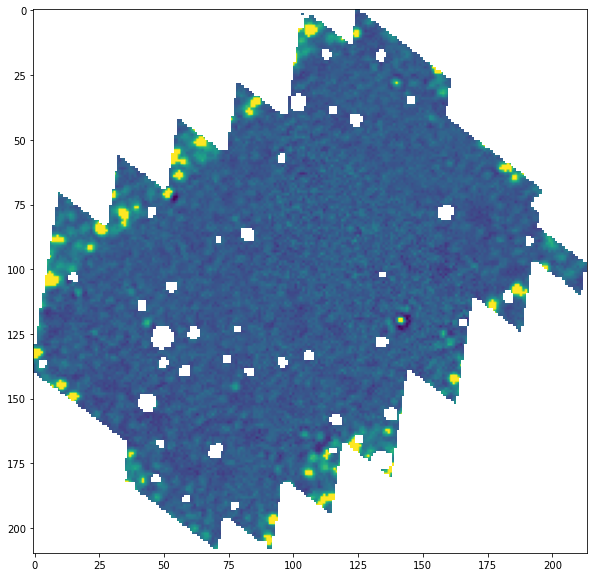

In [32]:
plt.figure(figsize=(15,10))
plt.imshow(Pval8[1].data)

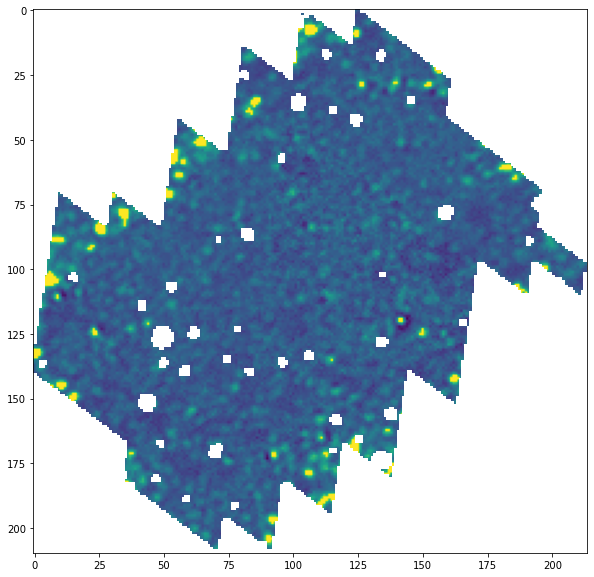

In [19]:
plt.figure(figsize=(15,10))
plt.imshow(Pval9[1].data)

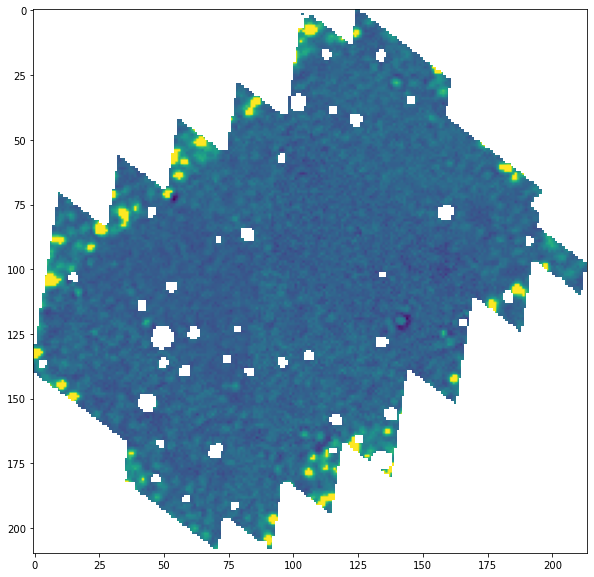

In [17]:
plt.figure(figsize=(15,10))
plt.imshow(Pval7[1].data)